In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = pd.read_csv("IRIS.csv")

In [5]:
iris.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
df0 = iris[:50]
df1 = iris[50:100]
df2 = iris[100:]

In [15]:
print(df0.head())
print(df1.head())
print(df2.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
50  51            7.0           3.2            4.7           1.4   
51  52            6.4           3.2            4.5           1.5   
52  53            6.9           3.1            4.9           1.5   
53  54            5.5           2.3            4.0           1.3   
54  55            6.5           2.8            4.6           1.5   

            Species  
50  Iris-versicolor  
51  Iris-versicolor  
52  Iris-versicolor  
53  Iris-versicolor  
54  Iris-versicolor

In [16]:
print(df0.columns)
print(df1.columns)
print(df2.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


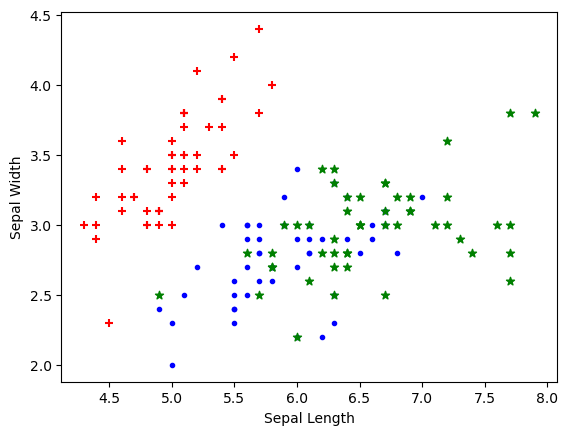

In [17]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['SepalLengthCm'], df0['SepalWidthCm'], color = "red", marker="+")
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], color = "blue", marker=".")
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'], color = "green", marker="*")

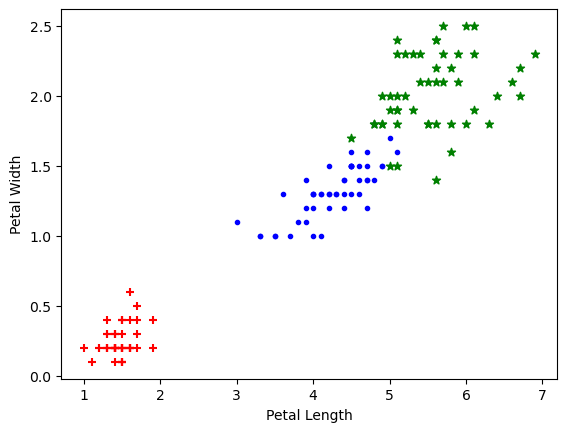

In [18]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'], color = "red", marker="+")
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], color = "blue", marker=".")
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], color = "green", marker="*")

In [20]:
print(iris['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [22]:
mappings = {'Iris-setosa':0 , 'Iris-versicolor':1 , 'Iris-virginica':2 }
iris['Classification'] = iris['Species'].map(mappings)

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Classification']

In [26]:
x_train, x_test , y_train , y_test = train_test_split(x,y,train_size=.3)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [28]:

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
knn.score(x_test, y_test)

0.8952380952380953

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

In [33]:
cm

array([[37,  0,  0],
       [ 0, 33,  1],
       [ 0, 10, 24]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

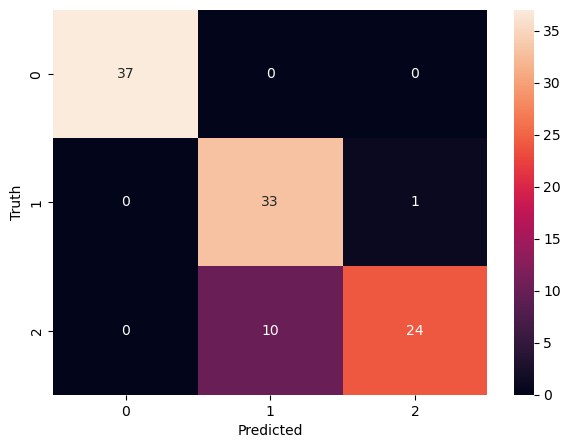

In [34]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.77      0.97      0.86        34
           2       0.96      0.71      0.81        34

    accuracy                           0.90       105
   macro avg       0.91      0.89      0.89       105
weighted avg       0.91      0.90      0.89       105

